<a href="https://colab.research.google.com/github/jrDhiraj/machineLearning/blob/main/house_predicationANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [58]:
df = pd.read_csv('/content/global_house_purchase_dataset.csv')

In [59]:
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [60]:
df = df.drop('property_id', axis=1)

In [61]:
df.head(5)

,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


**questins**
which country have high price , which have less
which city have hihe price , which have less
which furniture_states have high and low price
maximum price of house
how much cost of house last construncted year
maximum rooms in porpoty size



In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  200000 non-null  object 
 1   city                     200000 non-null  object 
 2   property_type            200000 non-null  object 
 3   furnishing_status        200000 non-null  object 
 4   property_size_sqft       200000 non-null  int64  
 5   price                    200000 non-null  int64  
 6   constructed_year         200000 non-null  int64  
 7   previous_owners          200000 non-null  int64  
 8   rooms                    200000 non-null  int64  
 9   bathrooms                200000 non-null  int64  
 10  garage                   200000 non-null  int64  
 11  garden                   200000 non-null  int64  
 12  crime_cases_reported     200000 non-null  int64  
 13  legal_cases_on_property  200000 non-null  int64  
 14  cust

In [63]:
df.describe()

,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3195.633460,1.215365e+06,1991.487770,3.001370,4.513855,2.760030,0.499350,0.500215,1.229065,0.248920,46528.625830,7.597583e+05,19.986375,10559.693105,4.556068e+05,0.195387,5.498650,5.505240,5.495615,0.230340
std,1613.322287,8.236633e+05,18.494064,2.002198,2.295669,1.840959,0.500001,0.500001,1.185336,0.432388,27997.353766,5.489401e+05,7.081080,5427.241879,3.629865e+05,0.219689,2.875361,2.870945,2.870206,0.421052
min,400.000000,5.628800e+04,1960.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,2.350400e+04,10.000000,500.000000,8.966000e+03,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1802.000000,5.659895e+05,1975.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21450.000000,3.372802e+05,15.000000,5770.000000,1.849592e+05,0.070000,3.000000,3.000000,3.000000,0.000000
50%,3190.000000,1.023429e+06,1991.000000,3.000000,5.000000,2.000000,0.000000,1.000000,1.000000,0.000000,41465.000000,6.269325e+05,20.000000,10520.000000,3.561700e+05,0.130000,5.000000,5.000000,5.000000,0.000000
75%,4589.000000,1.725556e+06,2008.000000,5.000000,7.000000,4.000000,1.000000,1.000000,2.000000,0.000000,70805.000000,1.058416e+06,25.000000,15260.000000,6.257352e+05,0.240000,8.000000,8.000000,8.000000,0.000000
max,6000.000000,4.202732e+06,2023.000000,6.000000,8.000000,8.000000,1.000000,1.000000,10.000000,1.000000,100000.000000,3.520150e+06,30.000000,20000.000000,2.492723e+06,3.460000,10.000000,10.000000,10.000000,1.000000


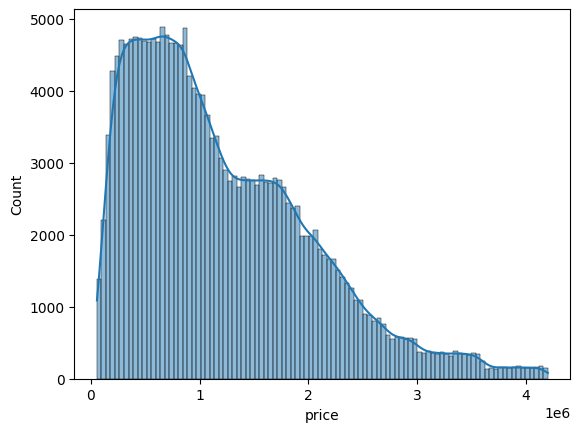

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=100, kde=True)
plt.show()

In [65]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [66]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [67]:
df.head()

,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


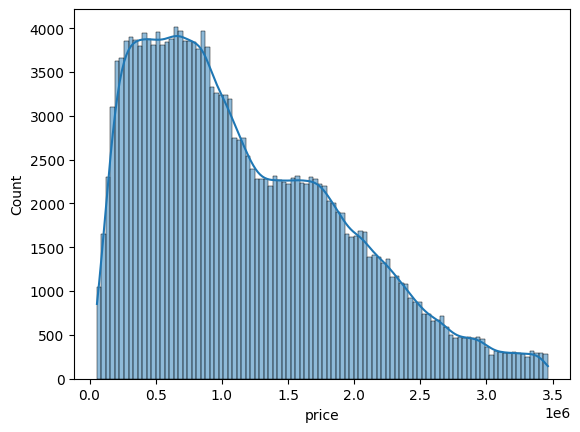

In [68]:
sns.histplot(df['price'], bins=100, kde=True)
plt.show()

In [69]:
df['country'].unique()

array(['France', 'South Africa', 'Germany', 'Canada', 'Brazil', 'UAE',
       'Australia', 'UK', 'USA', 'China', 'Singapore', 'India', 'Japan'],
      dtype=object)

In [70]:
df['city'].unique()

array(['Marseille', 'Cape Town', 'Johannesburg', 'Frankfurt', 'Montreal',
       'Rio de Janeiro', 'São Paulo', 'Dubai', 'Melbourne', 'London',
       'Liverpool', 'San Francisco', 'Beijing', 'Shanghai', 'Manchester',
       'Los Angeles', 'Singapore', 'Pune', 'Toronto', 'Tokyo',
       'Birmingham', 'Chennai', 'Kyoto', 'Munich', 'Shenzhen', 'Chicago',
       'Houston', 'New York', 'Abu Dhabi', 'Brisbane', 'Lyon', 'Sydney',
       'Berlin', 'Paris', 'Bangalore', 'Osaka', 'Vancouver', 'Mumbai',
       'Hyderabad', 'Delhi'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'France'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'UAE'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'UK'),
  Text(8, 0, 'USA'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'India'),
  Text(12, 0, 'Japan')])

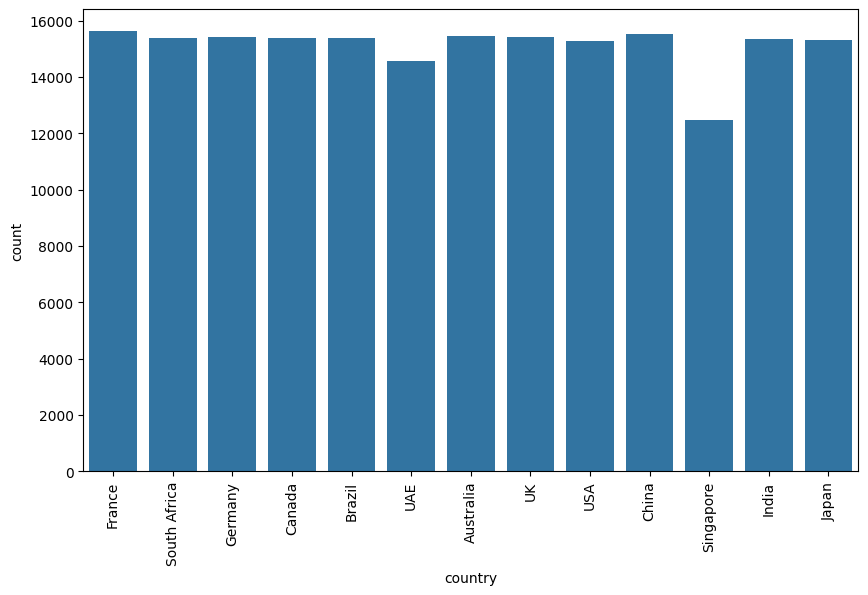

In [71]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df , x='country')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Marseille'),
  Text(1, 0, 'Cape Town'),
  Text(2, 0, 'Johannesburg'),
  Text(3, 0, 'Frankfurt'),
  Text(4, 0, 'Montreal'),
  Text(5, 0, 'Rio de Janeiro'),
  Text(6, 0, 'São Paulo'),
  Text(7, 0, 'Dubai'),
  Text(8, 0, 'Melbourne'),
  Text(9, 0, 'London'),
  Text(10, 0, 'Liverpool'),
  Text(11, 0, 'San Francisco'),
  Text(12, 0, 'Beijing'),
  Text(13, 0, 'Shanghai'),
  Text(14, 0, 'Manchester'),
  Text(15, 0, 'Los Angeles'),
  Text(16, 0, 'Singapore'),
  Text(17, 0, 'Pune'),
  Text(18, 0, 'Toronto'),
  Text(19, 0, 'Tokyo'),
  Text(20, 0, 'Birmingham'),
  Text(21, 0, 'Chennai'),
  Text(22, 0, 'Kyoto'),
  Text(23, 0, 'Munich'),
  Text(24, 0, 'Shenzhen'),
  Text(25, 0, 'Chicago'),
  Text(26, 0, 'Houston'),
  Text(27, 0, 'New York'),
  Text(28, 0, 'A

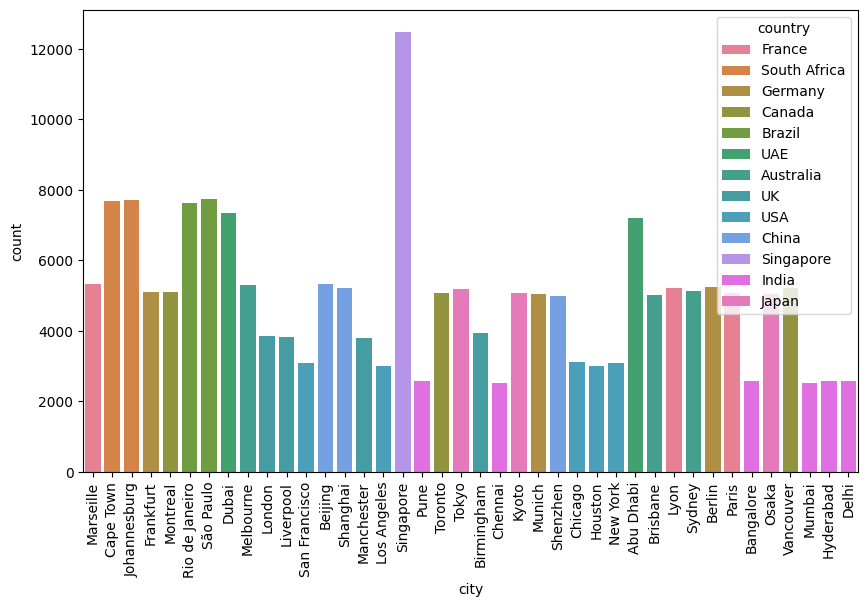

In [72]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df , x='city', hue='country')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Farmhouse'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Townhouse'),
  Text(3, 0, 'Villa'),
  Text(4, 0, 'Studio'),
  Text(5, 0, 'Independent House')])

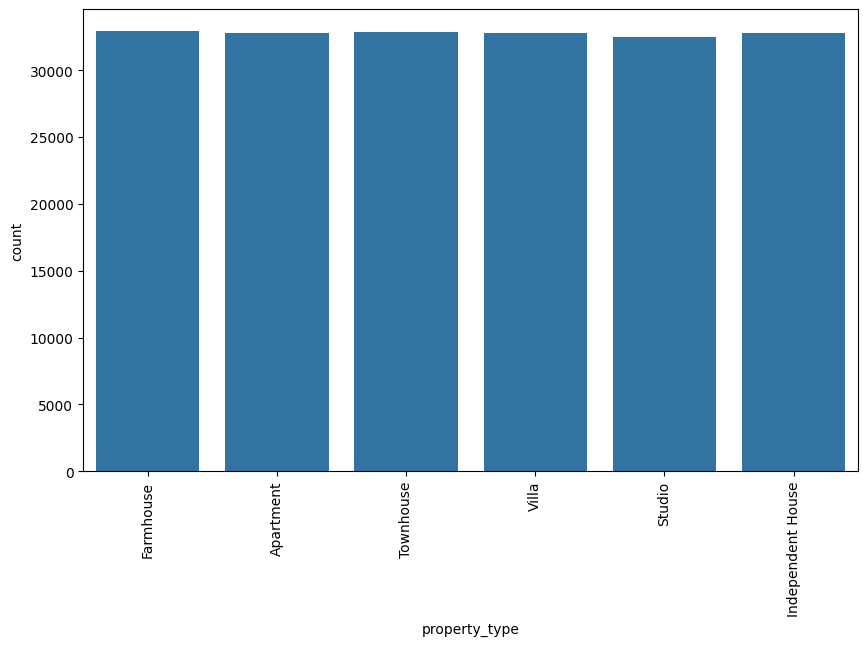

In [73]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df , x='property_type')
plt.xticks(rotation=90)

([0, 1, 2],
 [Text(0, 0, 'Semi-Furnished'),
  Text(1, 0, 'Fully-Furnished'),
  Text(2, 0, 'Unfurnished')])

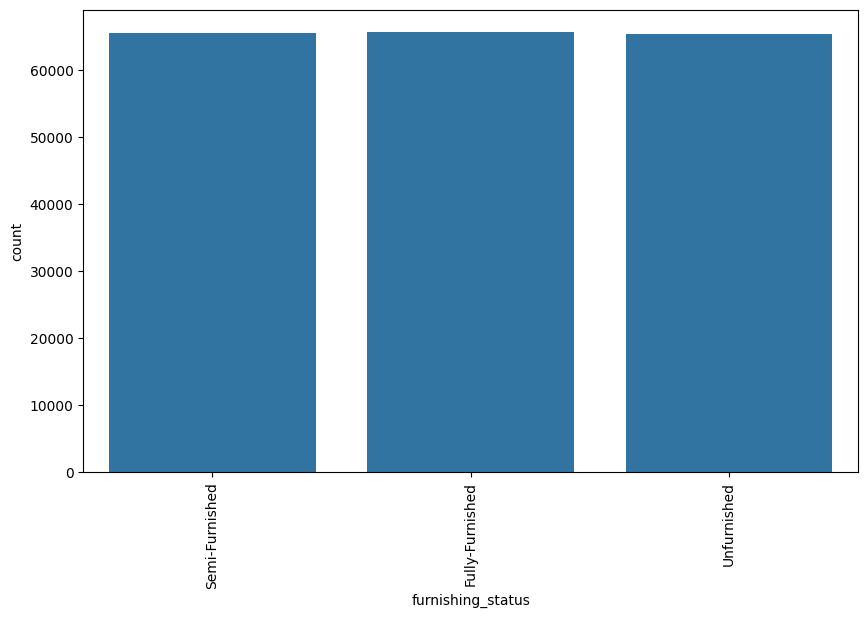

In [74]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df , x='furnishing_status')
plt.xticks(rotation=90)

In [75]:
df.head()

,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [76]:
# plt.figure(figsize=(10,6))

# sns.countplot(data=df , x='property_size_sqft')
# plt.xticks(rotation=90)

In [77]:
# plt.figure(figsize=(10,6))

# sns.histplot(data=df , x='property_size_sqft', kde=True)
# plt.xticks(rotation=90)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196626 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  196626 non-null  object 
 1   city                     196626 non-null  object 
 2   property_type            196626 non-null  object 
 3   furnishing_status        196626 non-null  object 
 4   property_size_sqft       196626 non-null  int64  
 5   price                    196626 non-null  int64  
 6   constructed_year         196626 non-null  int64  
 7   previous_owners          196626 non-null  int64  
 8   rooms                    196626 non-null  int64  
 9   bathrooms                196626 non-null  int64  
 10  garage                   196626 non-null  int64  
 11  garden                   196626 non-null  int64  
 12  crime_cases_reported     196626 non-null  int64  
 13  legal_cases_on_property  196626 non-null  int64  
 14  customer_

In [79]:
# plt.figure(figsize=(10,6))

# sns.countplot(data=df , x='constructed_year')
# plt.xticks(rotation=90)

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5')])

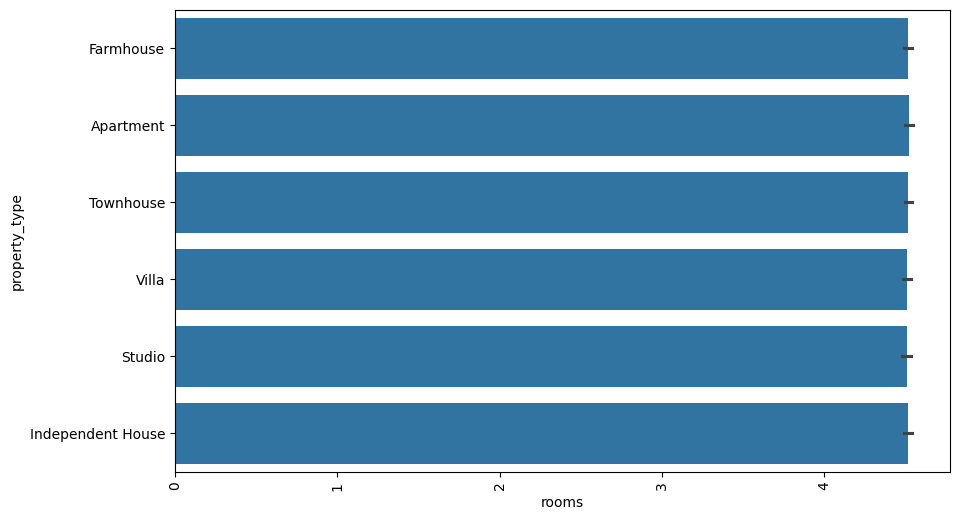

In [80]:
plt.figure(figsize=(10,6))

sns.barplot(data=df , x='rooms', y = 'property_type')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

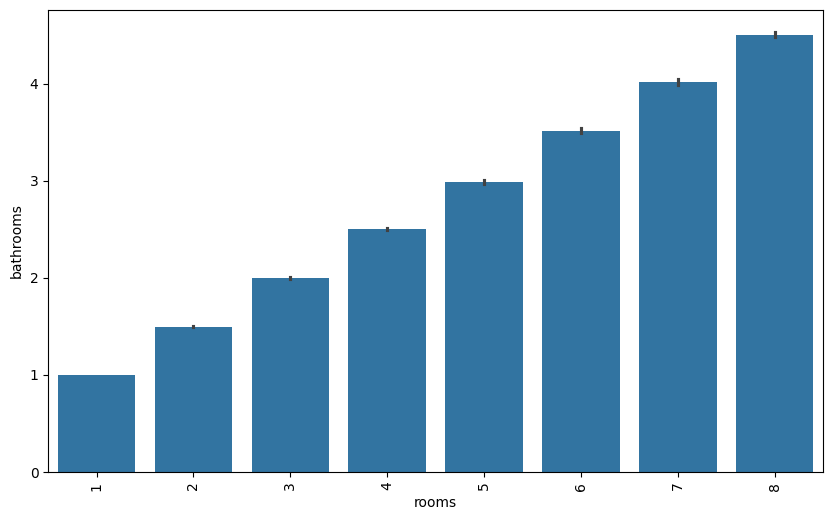

In [81]:
plt.figure(figsize=(10,6))

sns.barplot(data=df , x='rooms', y = 'bathrooms')
plt.xticks(rotation=90)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0.0, 0, '0.00'),
  Text(0.25, 0, '0.25'),
  Text(0.5, 0, '0.50'),
  Text(0.75, 0, '0.75'),
  Text(1.0, 0, '1.00'),
  Text(1.25, 0, '1.25'),
  Text(1.5, 0, '1.50'),
  Text(1.75, 0, '1.75'),
  Text(2.0, 0, '2.00'),
  Text(2.25, 0, '2.25')])

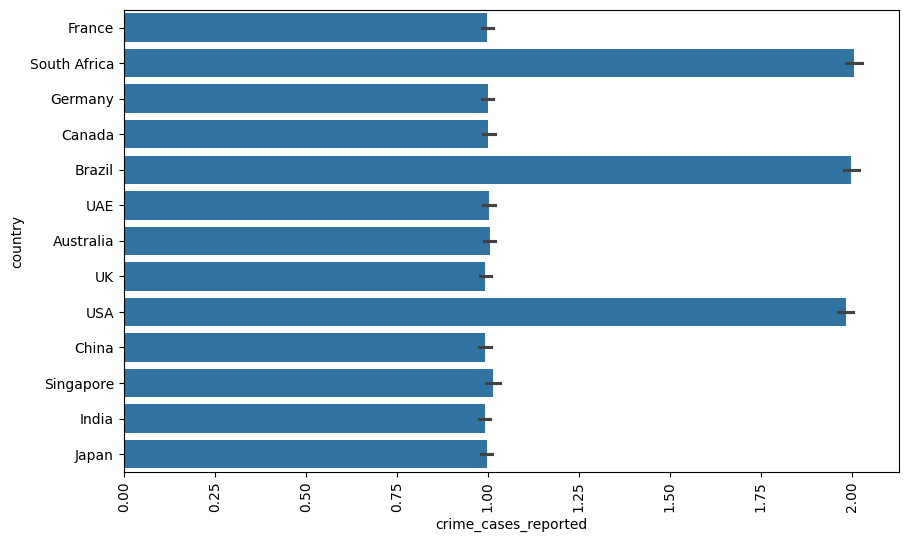

In [82]:
plt.figure(figsize=(10,6))

sns.barplot(data=df , x='crime_cases_reported', y='country', )
plt.xticks(rotation=90)

In [83]:
df['crime_cases_reported'].unique()

array([ 1,  0,  3,  4,  2,  6,  5,  9,  7,  8, 10])

In [84]:
df.isnull().sum()

,0
country,0
city,0
property_type,0
furnishing_status,0
property_size_sqft,0
price,0
constructed_year,0
previous_owners,0
rooms,0
bathrooms,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'France'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'UAE'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'UK'),
  Text(8, 0, 'USA'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'India'),
  Text(12, 0, 'Japan')])

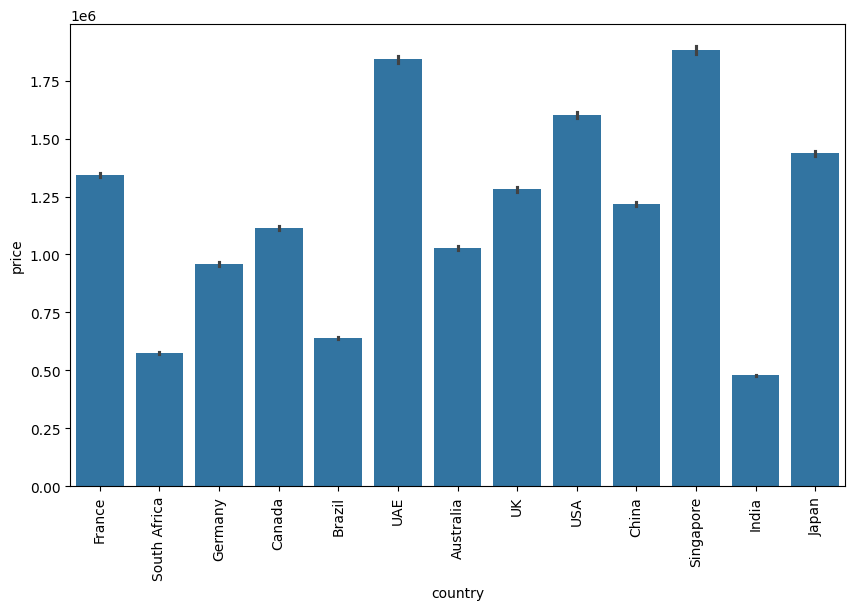

In [85]:
plt.figure(figsize=(10,6))

sns.barplot(data=df , x='country', y='price')
plt.xticks(rotation=90)

In [86]:
# plt.figure(figsize=(10,6))

# sns.barplot(data=df , x='city', y='price')
# plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'France'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'UAE'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'UK'),
  Text(8, 0, 'USA'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'India'),
  Text(12, 0, 'Japan')])

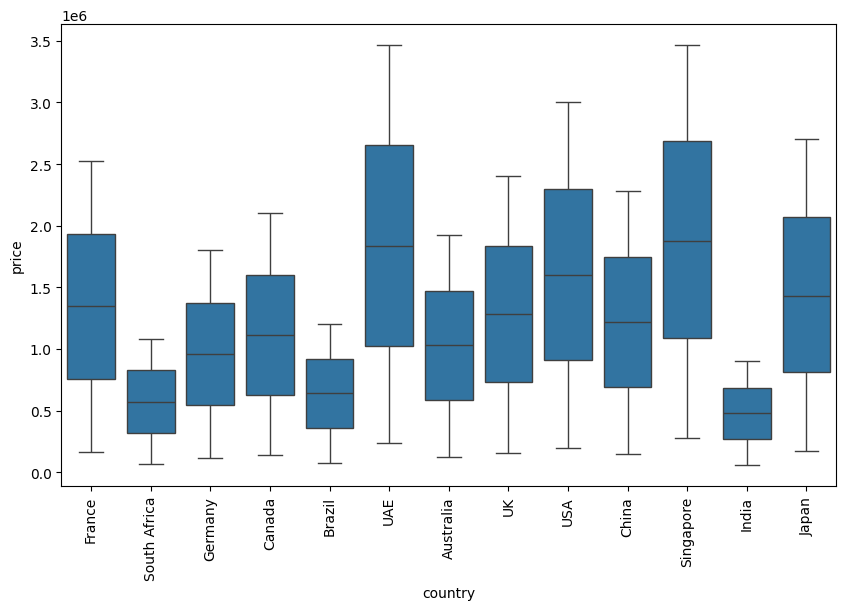

In [87]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df , x='country', y='price')
plt.xticks(rotation=90)

<Axes: xlabel='furnishing_status', ylabel='price'>

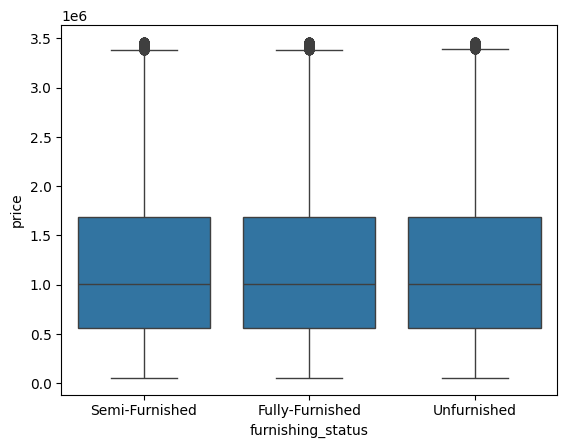

In [88]:
sns.boxplot(data=df, x='furnishing_status', y='price')

In [89]:
df['price'].max()


3464742

<Axes: xlabel='constructed_year', ylabel='price'>

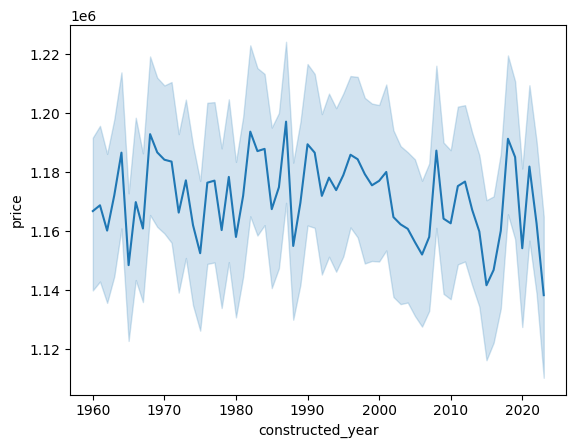

In [90]:
sns.lineplot(data=df, x='constructed_year', y='price')

<Axes: xlabel='rooms', ylabel='property_size_sqft'>

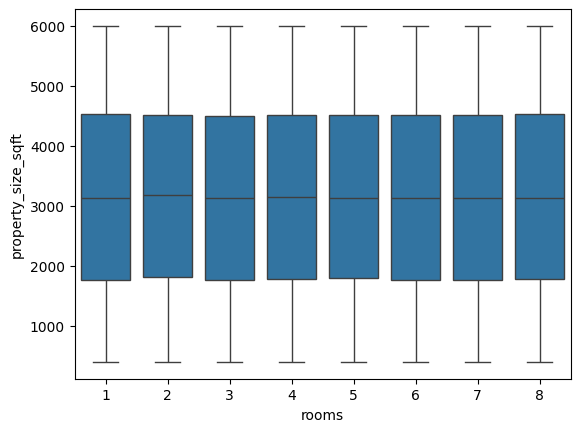

In [91]:
sns.boxplot(data=df, x='rooms', y='property_size_sqft')



In [92]:
# sns.scatterplot(data=df, x='property_size_sqft', y='rooms', alpha=0.3)


In [93]:
# sns.lmplot(data=df, x='property_size_sqft', y='rooms')


In [94]:
# df = pd.get_dummies(df, drop_first=True)

In [95]:
df.shape

(196626, 24)

In [96]:
df.head()

,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


# Linear Regression

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define columns
num_cols = ['property_size_sqft','constructed_year','customer_salary','loan_amount']
cat_cols = ['country','city','property_type','furnishing_status']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 31788087593.309593
R² Score: 0.9445619321404417


***RandpmForest***

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("price", axis=1)
y = df["price"]

X = pd.get_dummies(X, drop_first=True)

# Example dataset (replace with your own X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 9045288.56894955
R2: 0.9999842251182924


In [99]:
y_pred = rf.predict(X_test)


In [100]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 9045288.56894955
R2 Score: 0.9999842251182924


In [101]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 9045288.56894955
R2 Score: 0.9999842251182924


Ann

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [103]:
# Features and target
X = df.drop("price", axis=1)
y = df["price"]

# Convert categorical to numeric (same as before)
X = pd.get_dummies(X, drop_first=True)
y = np.log1p(df["price"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for ANN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [111]:
# Define model
model = Sequential()

# Input + first hidden layer (units = number of neurons)
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))

# Output layer (1 neuron for regression)
model.add(Dense(units=1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [113]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,           # you can increase epochs since early stopping will stop when needed
    batch_size=32,
    callbacks=[es],
    verbose=1
)


Epoch 1/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 325101420544.0000 - mae: 258117.3594 - val_loss: 94803928.0000 - val_mae: 7117.4858
Epoch 2/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 50138536.0000 - mae: 5121.1118 - val_loss: 20132754.0000 - val_mae: 3521.9651
Epoch 3/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 18569482.0000 - mae: 3350.6013 - val_loss: 14474750.0000 - val_mae: 3041.3474
Epoch 4/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 17159280.0000 - mae: 3221.6094 - val_loss: 25858322.0000 - val_mae: 4019.1401
Epoch 5/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 16750658.0000 - mae: 3167.2827 - val_loss: 12895327.0000 - val_mae: 2847.0271
Epoch 6/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 15611943.0000 - mae: 3064.9700 - val_loss: 22954974.0000 - val_mae: 3746.2097
Epoch 7/100
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 15013779.0000 - mae: 3019.2993 - val_loss: 51670588.0000 - val_mae: 5381.3838


In [106]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1812.8067626953125


In [107]:
y_pred = model.predict(X_test)
print(y_pred[:5])  # first 5 predictions


1229/1229 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[1069729.4 ]
 [ 798575.9 ]
 [2478058.8 ]
 [ 798832.75]
 [2275570.  ]]


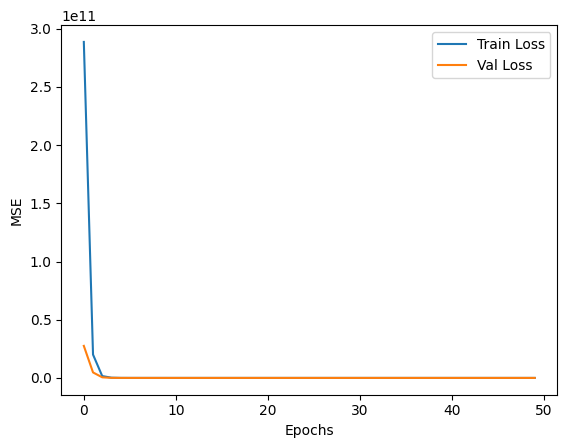

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


1229/1229 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


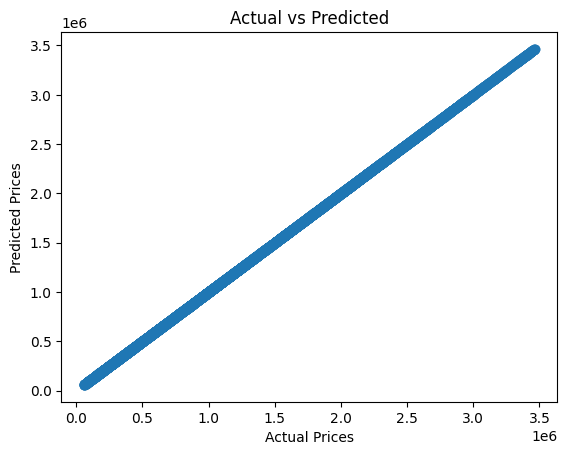

In [109]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).flatten()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()


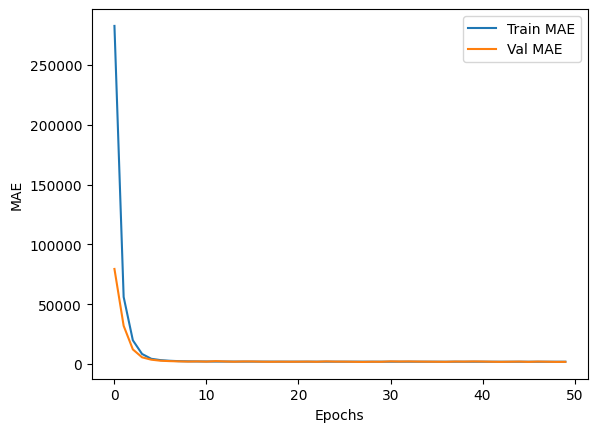

In [110]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()
